In [1]:
# Remember to adjust your student ID in meta.xml
import numpy as np
import pickle
import random
import gym
from simple_custom_taxi_env import SimpleTaxiEnv
from tqdm import tqdm
import globals

c:\Users\qwer9\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\envs\registration.py:307: DeprecationWarning: The package name gym_minigrid has been deprecated in favor of minigrid. Please uninstall gym_minigrid and install minigrid with `pip install minigrid`. Future releases will be maintained under the new package name minigrid.
  fn()


In [ ]:
# def table_q_learning(episode = 5000, alpha = 0.1, gamma = 0.99, epsilon_start = 1.0, epsilon_end = 0.1, epsilon_decay = 0.999):
#     q_table = {}
#     total_rewards = []

#     for i in tqdm(range(episode)):
#         env = SimpleTaxiEnv(fuel_limit=5000)
#         raw_state, _ = env.reset()
#         total_reward = 0
#         done = False
#         step_count = 0
#         epsilon = epsilon_start
#         taxi_row, taxi_col, _,_,_,_,_,_,_,_,obstacle_north, obstacle_south, obstacle_east, obstacle_west, passenger_look, destination_look = raw_state
#         taxi_pos = (taxi_row, taxi_col)
#         state = ( obstacle_south, obstacle_north, obstacle_east, obstacle_west)

#         saved = False
#         # if (i + 1) % 10000 == 0:
#         #     saved = True
#         #     print(f"=========================={i+1}th episodes Start!==========================")
        
#         while not done:
#             if state not in q_table:
#                 q_table[state] = np.zeros(6)
#             if random.uniform(0, 1) < epsilon:
#                 action = random.choice([0, 1, 2, 3, 4, 5])
#             else:
#                 action = np.argmax(q_table[state])
#             next_raw_state, reward, done, _ = env.step(action)

#             if saved:
#                 env.render_env(taxi_pos, action = action, step = step_count)

#             taxi_row, taxi_col, _,_,_,_,_,_,_,_,obstacle_north, obstacle_south, obstacle_east, obstacle_west, passenger_look, destination_look = next_raw_state
#             taxi_pos = (taxi_row, taxi_col)
#             next_state = ( obstacle_south, obstacle_north, obstacle_east, obstacle_west)
#             if next_state not in q_table:
#                 q_table[next_state] = np.zeros(6)
#             q_table[state][action] = q_table[state][action] + alpha*(reward + gamma*np.max(q_table[next_state]) - q_table[state][action])
#             state = next_state
#             total_reward += reward
#             step_count += 1
#             if epsilon > epsilon_end:
#                 epsilon *= epsilon_decay
#             # if step_count > 500:
#             #     break

#         total_rewards.append(total_reward)
#         if saved:
#             print(f"Episode: {i + 1}/{episode}, Total Reward: {total_reward}, Steps: {step_count}, Epsilon: {epsilon}")

#     return q_table, total_rewards

# def save_q_table(q_table):
#     with open('q_table.pkl', 'wb') as f:
#         pickle.dump(q_table, f)


In [2]:
def find_nearest_station(taxi_pos, station):
    distance = np.inf
    for (x,y) in station:
        temp_distance = abs(taxi_pos[0] - x) + abs(taxi_pos[1] - y)
        if temp_distance < distance:
            distance = temp_distance
            goal = (x, y)
    return goal

In [ ]:
# def table_q_learning(episode=5000, alpha=0.1, gamma=0.99, 
#                      epsilon_start=1.0, epsilon_end=0.1, epsilon_decay=0.999):
#     q_table = {}
#     total_rewards = []
#     epsilon = epsilon_start
#     total_steps = []

#     for i in tqdm(range(episode)):
#         # Initialize environment; ensure SimpleTaxiEnv is defined or imported.
#         env = SimpleTaxiEnv(fuel_limit=1 if i < 1000 else 1000)
#         raw_state, _ = env.reset()
#         total_reward = 0
#         done = False
#         step_count = 0

#         taxi_row, taxi_col, R_x, R_y, G_x, G_y, Y_x, Y_y, B_x, B_y, \
#         obstacle_north, obstacle_south, obstacle_east, obstacle_west, \
#         passenger_look, destination_look = raw_state

#         station = [(R_x, R_y), (G_x, G_y), (Y_x, Y_y), (B_x, B_y)]
#         globals.possible_passenger = set(station)
#         globals.possible_destination = set(station)
#         globals.has_passenger = False

#         taxi_pos = (taxi_row, taxi_col)
#         # Choose initial goal based on nearest station.
#         goal = find_nearest_station(taxi_pos, list(station))
#         globals.goal = goal
#         relative_goal_pos = (goal[0] - taxi_row, goal[1] - taxi_col)
#         state = (obstacle_south, obstacle_north, obstacle_east, obstacle_west, 
#                  relative_goal_pos[0], relative_goal_pos[1])

#         while not done:
#             if state not in q_table:
#                 q_table[state] = np.zeros(6)
#             # Choose an action using an epsilon-greedy strategy.
#             if random.uniform(0, 1) < epsilon:
#                 action = random.choice(range(6))
#             else:
#                 action = np.argmax(q_table[state])
            
#             next_raw_state, reward, done, _ = env.step(action)
#             shaped_reward = reward
#             if done:
#                 break
#             step_count += 1

#             taxi_row, taxi_col, R_x, R_y, G_x, G_y, Y_x, Y_y, B_x, B_y, obstacle_north, obstacle_south, obstacle_east, obstacle_west, passenger_look, destination_look = next_raw_state
#             taxi_pos = (taxi_row, taxi_col)

#             # Update adjacent cells and possible passenger/destination sets.
#             adjacent = {(taxi_row + 1, taxi_col), (taxi_row - 1, taxi_col), 
#                         (taxi_row, taxi_col + 1), (taxi_row, taxi_col - 1), 
#                         (taxi_row, taxi_col)}
#             if passenger_look:
#                 globals.possible_passenger.intersection_update(adjacent)
#             else:
#                 globals.possible_passenger.difference_update(adjacent)
#             if destination_look:
#                 globals.possible_destination.intersection_update(adjacent)
#             else:
#                 globals.possible_destination.difference_update(adjacent)

#             # Update goal using logic similar to get_action.
#             if not globals.has_passenger:
#                 if len(globals.possible_passenger) == 1:
#                     if taxi_pos in globals.possible_passenger and action == 4:
#                         globals.has_passenger = True
#                         globals.possible_passenger = set()
#                         goal = list(globals.possible_destination)[0]
#                         globals.goal = goal
#                         shaped_reward += 100
#                     else:
#                         goal = list(globals.possible_passenger)[0]
#                         globals.goal = goal
#                 else:
#                     if globals.goal in globals.possible_passenger:
#                         goal = globals.goal
#                     else:
#                         goal = find_nearest_station(taxi_pos, list(globals.possible_passenger))
#                         globals.goal = goal
#             else:
#                 if action == 5:
#                     if len(globals.possible_destination) == 1 and taxi_pos in globals.possible_destination:
#                         shaped_reward += 100
#                     else:
#                         globals.has_passenger = False
#                         globals.possible_passenger = {taxi_pos}
#                         goal = taxi_pos
#                         globals.goal = goal
#                         shaped_reward -= 120
#                 else:
#                     if globals.goal in globals.possible_destination:
#                         goal = globals.goal
#                     else:
#                         goal = find_nearest_station(taxi_pos, list(globals.possible_destination))
#                         globals.goal = goal

#             relative_goal_pos = (goal[0] - taxi_row, goal[1] - taxi_col)
#             next_state = (obstacle_south, obstacle_north, obstacle_east, obstacle_west, 
#                           relative_goal_pos[0], relative_goal_pos[1])
            
#             if next_state not in q_table:
#                 q_table[next_state] = np.zeros(6)

#             # Reward Shaping
#             shaped_reward -= 1 * ( abs(relative_goal_pos[0]) + abs(relative_goal_pos[1]) )
#             total_reward += shaped_reward

#             # Q-learning update using the next state's maximum Q-value.
#             q_table[state][action] = q_table[state][action] + alpha * (
#                 shaped_reward + gamma * np.max(q_table[next_state]) - q_table[state][action])
#             state = next_state

#         epsilon = max(epsilon_end, epsilon * epsilon_decay)

#         total_rewards.append(total_reward)
#         total_steps.append(step_count)
#         if (i + 1) % 10000 == 0:
#             print(f"Episode: {i + 1}/{episode}, Total Reward: {total_reward}, "
#                   f"Steps: {step_count}, Epsilon: {epsilon}")

#     return q_table, total_rewards

# def save_q_table(q_table):
#     with open('q_table.pkl', 'wb') as f:
#         pickle.dump(q_table, f)


In [23]:
def table_q_learning(
    episode=5000, alpha=0.1, gamma=0.99,
    epsilon_start=1.0, epsilon_end=0.1, epsilon_decay=0.999, memory=10000
):
    q_table = {}
    total_rewards = []
    total_steps = []
    epsilon = epsilon_start

    for i in tqdm(range(episode)):
        # Initialize environment
        fuel_limit = 1 if i < 0.1 * episode else 1000
        env = SimpleTaxiEnv(fuel_limit=fuel_limit)
        raw_state, _ = env.reset()
        total_reward = 0
        done = False
        step_count = 0

        saved = False
        if (i + 1) % memory == 0:
            saved = True
            print(f"=========================={i+1}th episodes Start!==========================")

        # Unpack environment state
        (
            taxi_row, taxi_col, R_x, R_y, G_x, G_y, Y_x, Y_y, B_x, B_y,
            obstacle_north, obstacle_south, obstacle_east, obstacle_west,
            passenger_look, destination_look
        ) = raw_state

        # Setup global variables
        station = [(R_x, R_y), (G_x, G_y), (Y_x, Y_y), (B_x, B_y)]
        globals.possible_passenger = set(station)
        globals.possible_destination = set(station)
        globals.has_passenger = False

        taxi_pos = (taxi_row, taxi_col)
        goal = find_nearest_station(taxi_pos, list(station))
        globals.goal = goal

        relative_goal_pos = (goal[0] - taxi_row, goal[1] - taxi_col)
        state = (
            obstacle_south, obstacle_north, obstacle_east, obstacle_west,
            relative_goal_pos[0], relative_goal_pos[1], globals.has_passenger
        )

        # Q-learning loop
        while not done:
            # Initialize Q-values for unseen state
            if state not in q_table:
                q_table[state] = np.zeros(6)

            # Epsilon-greedy action selection
            if random.uniform(0, 1) < epsilon:
                action = random.choice(range(6))
            else:
                action = np.argmax(q_table[state])

            # Take action in environment
            next_raw_state, reward, done, _ = env.step(action)
            shaped_reward = reward

            step_count += 1

            if saved:
                env.render_env(taxi_pos, action = action, step = step_count)

            # Unpack next state
            (
                taxi_row, taxi_col, R_x, R_y, G_x, G_y, Y_x, Y_y, B_x, B_y,
                obstacle_north, obstacle_south, obstacle_east, obstacle_west,
                passenger_look, destination_look
            ) = next_raw_state

            taxi_pos = (taxi_row, taxi_col)

            # Update adjacent observations
            adjacent = {
                (taxi_row + 1, taxi_col), (taxi_row - 1, taxi_col),
                (taxi_row, taxi_col + 1), (taxi_row, taxi_col - 1),
                (taxi_row, taxi_col)
            }

            if passenger_look:
                globals.possible_passenger.intersection_update(adjacent)
            else:
                globals.possible_passenger.difference_update(adjacent)

            if destination_look:
                globals.possible_destination.intersection_update(adjacent)
            else:
                globals.possible_destination.difference_update(adjacent)

            # Goal logic
            if not globals.has_passenger:
                if len(globals.possible_passenger) == 1:
                    if taxi_pos in globals.possible_passenger and action == 4:
                        globals.has_passenger = True
                        globals.possible_passenger = set()
                        goal = list(globals.possible_destination)[0]
                        globals.goal = goal
                        shaped_reward += 20
                    else:
                        goal = list(globals.possible_passenger)[0]
                        globals.goal = goal
                else:
                    if globals.goal in globals.possible_passenger:
                        goal = globals.goal
                    else:
                        goal = find_nearest_station(taxi_pos, list(globals.possible_passenger))
                        globals.goal = goal
            else:
                if action == 5:
                    if len(globals.possible_destination) == 1 and taxi_pos in globals.possible_destination:
                        shaped_reward += 100
                    else:
                        globals.has_passenger = False
                        globals.possible_passenger = {taxi_pos}
                        goal = taxi_pos
                        globals.goal = goal
                        shaped_reward -= 30
                        if saved:
                            print("Passenger Dropped in a wrong place")
                else:
                    if globals.goal in globals.possible_destination:
                        goal = globals.goal
                    else:
                        goal = find_nearest_station(taxi_pos, list(globals.possible_destination))
                        globals.goal = goal

            # Compute next state
            relative_goal_pos = (goal[0] - taxi_row, goal[1] - taxi_col)
            next_state = (
                obstacle_south, obstacle_north, obstacle_east, obstacle_west,
                relative_goal_pos[0], relative_goal_pos[1], globals.has_passenger
            )

            if next_state not in q_table:
                q_table[next_state] = np.zeros(6)

            # Reward shaping (distance to goal)
            shaped_reward -= 1 * (abs(relative_goal_pos[0]) + abs(relative_goal_pos[1]))
            total_reward += shaped_reward

            if saved:
                print(f"Shaped_Reward: {shaped_reward}, Reward: {reward}")

            # Q-learning update
            q_table[state][action] += alpha * (
                shaped_reward + gamma * np.max(q_table[next_state]) - q_table[state][action]
            )

            state = next_state

        # Epsilon decay
        epsilon = max(epsilon_end, epsilon * epsilon_decay)

        total_rewards.append(total_reward)
        total_steps.append(step_count)

        # Optional progress logging
        if (i + 1) % 10000 == 0:
            print(f"Episode: {i + 1}/{episode}, Total Reward: {total_reward}, "
                  f"Steps: {step_count}, Epsilon: {epsilon:.4f}")

    return q_table, total_rewards


def save_q_table(q_table, filename='q_table.pkl'):
    """Save the Q-table to a file using pickle."""
    with open(filename, 'wb') as f:
        pickle.dump(q_table, f)

In [24]:
q_table, total_rewards = table_q_learning(episode = 150000, alpha = 0.1, gamma = 0.99, epsilon_start = 1.0, epsilon_end = 0.1, epsilon_decay = 0.9999, memory = 150000)
save_q_table(q_table)

 10%|▉         | 14749/150000 [00:00<00:06, 19715.35it/s]

Episode: 10000/150000, Total Reward: -14.1, Steps: 1, Epsilon: 0.3679


 13%|█▎        | 19716/150000 [00:19<06:05, 356.64it/s]  

Episode: 20000/150000, Total Reward: 153.8, Steps: 12, Epsilon: 0.1353


 20%|██        | 30051/150000 [01:00<04:49, 414.94it/s]

Episode: 30000/150000, Total Reward: -4149.999999999941, Steps: 1000, Epsilon: 0.1000


 27%|██▋       | 40097/150000 [01:31<03:32, 516.85it/s]

Episode: 40000/150000, Total Reward: -3310.999999999944, Steps: 1000, Epsilon: 0.1000


 33%|███▎      | 50065/150000 [01:57<04:45, 349.57it/s]

Episode: 50000/150000, Total Reward: 129.5, Steps: 15, Epsilon: 0.1000


 40%|████      | 60131/150000 [02:29<02:23, 626.99it/s]

Episode: 60000/150000, Total Reward: 59.90000000000006, Steps: 41, Epsilon: 0.1000


 47%|████▋     | 70030/150000 [02:48<03:03, 435.79it/s]

Episode: 70000/150000, Total Reward: 91.59999999999998, Steps: 24, Epsilon: 0.1000


 53%|█████▎    | 80054/150000 [03:18<03:02, 382.32it/s]

Episode: 80000/150000, Total Reward: -246.80000000000084, Steps: 118, Epsilon: 0.1000


 60%|██████    | 90114/150000 [03:47<02:26, 408.04it/s]

Episode: 90000/150000, Total Reward: 127.29999999999998, Steps: 17, Epsilon: 0.1000


 67%|██████▋   | 100114/150000 [04:16<01:34, 528.65it/s]

Episode: 100000/150000, Total Reward: 130.5, Steps: 15, Epsilon: 0.1000


 73%|███████▎  | 110078/150000 [04:42<01:21, 487.88it/s]

Episode: 110000/150000, Total Reward: 105.19999999999999, Steps: 18, Epsilon: 0.1000


 80%|████████  | 120070/150000 [05:07<01:07, 446.53it/s]

Episode: 120000/150000, Total Reward: -652.3000000000009, Steps: 133, Epsilon: 0.1000


 87%|████████▋ | 130059/150000 [05:31<00:46, 424.82it/s]

Episode: 130000/150000, Total Reward: 124.29999999999998, Steps: 17, Epsilon: 0.1000


 93%|█████████▎| 140073/150000 [05:54<00:18, 538.23it/s]

Episode: 140000/150000, Total Reward: 127.6, Steps: 14, Epsilon: 0.1000


100%|██████████| 150000/150000 [06:12<00:00, 402.86it/s] 

==========================150000th episodes Start!==========================

Step: 1
Taxi Position: (0, 3)
Passenger Position: (5, 1) 
Destination: (3, 0)
Fuel Left: None
Last Action: Move East

. . . D . . . .
. . . . . P . .
. Y . . . . . .
🚖 . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . B . . .


Shaped_Reward: -5.1, Reward: -0.1

Step: 2
Taxi Position: (1, 3)
Passenger Position: (5, 1) 
Destination: (3, 0)
Fuel Left: None
Last Action: Pick Up

. . . D . . . .
. . . . . P . .
. Y . . . . . .
. 🚖 . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . B . . .


Shaped_Reward: -15.1, Reward: -10.1

Step: 3
Taxi Position: (1, 3)
Passenger Position: (5, 1) 
Destination: (3, 0)
Fuel Left: None
Last Action: Move North

. . . D . . . .
. . . . . P . .
. Y . . . . . .
. 🚖 . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . B . . .


Shaped_Reward: -4.1, Reward: -0.1

Step: 4
Taxi Position: (1, 2)
Passenger Position: (5, 1) 
Destination: (

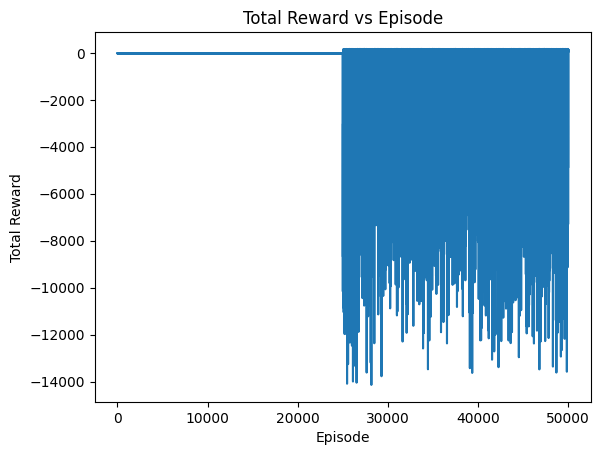

In [22]:
# plot total rewards
import matplotlib.pyplot as plt
plt.plot(total_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward vs Episode')
plt.show()

In [ ]:
# def table_q_learning(episode=5000, alpha=0.1, gamma=0.99, 
#                      epsilon_start=1.0, epsilon_end=0.1, epsilon_decay=0.999):
#     q_table = {}
#     total_rewards = []
#     epsilon = epsilon_start

#     for i in tqdm(range(episode)):
#         # Initialize environment; ensure SimpleTaxiEnv is defined or imported.
#         env = SimpleTaxiEnv(fuel_limit=1 if episode < 1000 else 1000)
#         raw_state, _ = env.reset()
#         total_reward = 0
#         done = False
#         step_count = 0

#         taxi_row, taxi_col, R_x, R_y, G_x, G_y, Y_x, Y_y, B_x, B_y, \
#         obstacle_north, obstacle_south, obstacle_east, obstacle_west, \
#         passenger_look, destination_look = raw_state

#         station = [(R_x, R_y), (G_x, G_y), (Y_x, Y_y), (B_x, B_y)]
#         globals.possible_passenger = set(station)
#         globals.possible_destination = set(station)
#         globals.has_passenger = False

#         taxi_pos = (taxi_row, taxi_col)
#         # Choose initial goal based on nearest station.
#         goal = find_nearest_station(taxi_pos, list(station))
#         globals.goal = goal
#         relative_goal_pos = (goal[0] - taxi_row, goal[1] - taxi_col)
#         state = (obstacle_south, obstacle_north, obstacle_east, obstacle_west, 
#                  relative_goal_pos[0], relative_goal_pos[1], globals.has_passenger)

#         while not done:
#             if state not in q_table:
#                 q_table[state] = np.zeros(6)
#             # Choose an action using an epsilon-greedy strategy.
#             if random.uniform(0, 1) < epsilon:
#                 action = random.choice(range(6))
#             else:
#                 action = np.argmax(q_table[state])
            
#             next_raw_state, reward, done, _ = env.step(action)
#             shaped_reward = reward
#             if done:
#                 break
#             step_count += 1

#             taxi_row, taxi_col, R_x, R_y, G_x, G_y, Y_x, Y_y, B_x, B_y, obstacle_north, obstacle_south, obstacle_east, obstacle_west, passenger_look, destination_look = next_raw_state
#             taxi_pos = (taxi_row, taxi_col)

#             # Update adjacent cells and possible passenger/destination sets.
#             adjacent = {(taxi_row + 1, taxi_col), (taxi_row - 1, taxi_col), 
#                         (taxi_row, taxi_col + 1), (taxi_row, taxi_col - 1), 
#                         (taxi_row, taxi_col)}
#             if passenger_look:
#                 globals.possible_passenger.intersection_update(adjacent)
#             else:
#                 globals.possible_passenger.difference_update(adjacent)
#             if destination_look:
#                 globals.possible_destination.intersection_update(adjacent)
#             else:
#                 globals.possible_destination.difference_update(adjacent)

#             # Update goal using logic similar to get_action.
#             if not globals.has_passenger:
#                 if len(globals.possible_passenger) == 1:
#                     if taxi_pos in globals.possible_passenger and action == 4:
#                         globals.has_passenger = True
#                         globals.possible_passenger = set()
#                         goal = list(globals.possible_destination)[0]
#                         globals.goal = goal
#                         shaped_reward += 150
#                     else:
#                         goal = list(globals.possible_passenger)[0]
#                         globals.goal = goal
#                 else:
#                     if globals.goal in globals.possible_passenger:
#                         goal = globals.goal
#                     else:
#                         goal = find_nearest_station(taxi_pos, list(globals.possible_passenger))
#                         globals.goal = goal
#             else:
#                 if action == 4:
#                     shaped_reward -= 150
#                 if action == 5:
#                     if len(globals.possible_destination) == 1 and taxi_pos in globals.possible_destination:
#                         shaped_reward += 500
#                         globals.has_passenger = False
#                         globals.possible_destination = {taxi_pos}
#                         goal = taxi_pos
#                         globals.goal = goal
#                     else:
#                         globals.has_passenger = False
#                         globals.possible_passenger = {taxi_pos}
#                         goal = taxi_pos
#                         globals.goal = goal
#                         shaped_reward -= 170
#                 else:
#                     if globals.goal in globals.possible_destination:
#                         goal = globals.goal
#                     else:
#                         goal = find_nearest_station(taxi_pos, list(globals.possible_destination))
#                         globals.goal = goal

#             relative_goal_pos = (goal[0] - taxi_row, goal[1] - taxi_col)
#             next_state = (obstacle_south, obstacle_north, obstacle_east, obstacle_west, 
#                           relative_goal_pos[0], relative_goal_pos[1])
            
#             if next_state not in q_table:
#                 q_table[next_state] = np.zeros(6)

#             # Reward Shaping
#             shaped_reward -= 1 * ( abs(relative_goal_pos[0]) + abs(relative_goal_pos[1]) )
#             total_reward += shaped_reward

#             # Q-learning update using the next state's maximum Q-value.
#             q_table[state][action] = q_table[state][action] + alpha * (
#                 shaped_reward + gamma * np.max(q_table[next_state]) - q_table[state][action])
#             state = next_state

#             epsilon = max(epsilon_end, epsilon * epsilon_decay)

#         total_rewards.append(total_reward)
#         if (i + 1) % 10000 == 0:
#             print(f"Episode: {i + 1}/{episode}, Total Reward: {total_reward}, "
#                   f"Steps: {step_count}, Epsilon: {epsilon}")

#     return q_table, total_rewards

# def save_q_table(q_table):
#     with open('q_table.pkl', 'wb') as f:
#         pickle.dump(q_table, f)


{(0, 1, 0, 0, 0, -3): array([359.75656397, 315.00083504, 345.93379972, 396.49665894,
       332.76824939, 342.85730756]), (0, 0, 0, 0, 0, -2): array([400.64992064, 401.34148533, 401.55714753, 368.01197668,
       400.99252013, 398.855994  ]), (0, 0, 1, 0, 1, -2): array([387.87031903, 387.54130325, 392.27704136, 408.14574456,
       390.86662903, 383.58894952]), (0, 0, 0, 0, 1, -1): array([400.88108214, 402.06391476, 405.39819104, 436.60549704,
       407.79751971, 403.64799243]), (0, 1, 0, 0, 2, -2): array([389.89956744, 349.19637719, 337.63180188, 317.81326478,
       339.07656983, 343.37043413]), (0, 0, 0, 1, 2, -1): array([423.23388393, 366.24080864, 374.49533136, 370.39957446,
       372.1886931 , 371.75180394]), (0, 1, 0, 0, -1, 5): array([103.9320341 ,  58.59212247, 267.33145626,  72.10646353,
       106.78234684, 122.03825935]), (0, 0, 0, 0, -1, 4): array([263.39466705, 349.29201923, 375.5956215 , 271.42022242,
       302.16992665, 340.3737292 ]), (0, 0, 0, 0, -2, 4): array([192

In [18]:
print(q_table)

{(0, 1, 0, 0, 3, 2, False): array([4786.41285711, 2818.73842717, 2544.81270455, 1489.71141642,
       2416.97154125, 1904.21054644]), (1, 0, 1, 0, 0, -1, False): array([5371.36306854, 5240.16129372, 5394.07385232, 6148.76435713,
       5299.89500339, 5411.99141745]), (0, 0, 1, 0, 1, -1, False): array([6074.83003632, 4942.09086519, 5053.65626633, 5206.44219503,
       5142.38711506, 5077.22105329]), (0, 1, 1, 0, 0, 2, False): array([4750.21744255, 4085.60696965, 3972.69632676, 4152.99849953,
       4079.32465929, 4075.59322542]), (0, 1, 0, 0, 0, 3, False): array([4062.4078227 , 4071.78501132, 5068.10610849, 3317.37939209,
       4059.99416409, 4172.44355415]), (0, 0, 0, 0, -2, -1, False): array([4782.58925769, 5845.6070346 , 4918.37825364, 4952.85655479,
       5096.90671193, 4883.61603377]), (1, 1, 1, 0, 0, -4, False): array([ 1.28551149e+02, -9.10000000e-01, -9.10000000e-01,  2.43330746e+03,
       -2.67900000e+00, -3.60137905e+00]), (1, 0, 0, 1, -1, 0, False): array([5642.83699388, 5